In [0]:
from google.colab import drive
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
path = '/gdrive/My Drive/Colab Notebooks/DataSets'

In [0]:
path_credit = os.path.join(path, 'credit_data.csv')
base = pd.read_csv(path_credit)

In [0]:
path_census = os.path.join(path, 'census.csv')
base_census = pd.read_csv(path_census)

##Base Credit Data

In [0]:
base = base.dropna()

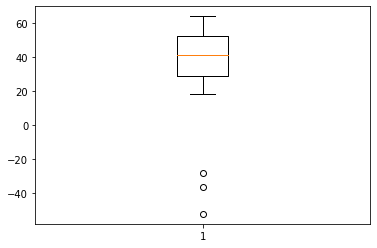

In [0]:
# outliers idade
import matplotlib.pyplot as plt
plt.boxplot(base.iloc[:,2], showfliers = True)
outliers_age = base[(base.age < -20)]

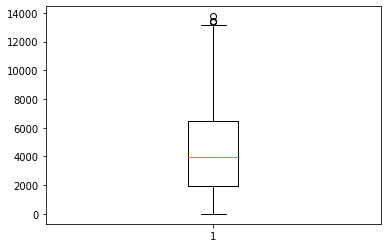

In [0]:
# outliers loan
plt.boxplot(base.iloc[:,3])
outliers_loan = base[(base.loan > 13400)]

In [0]:
base = base.dropna()
base.loc[base.age < 0, 'age'] = 40.92

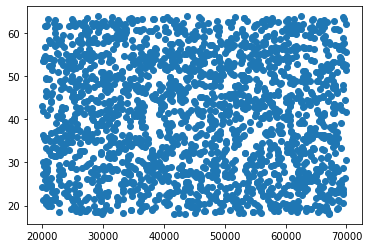

In [0]:
# income x age
import matplotlib.pyplot as plt
plt.scatter(base.iloc[:,1], base.iloc[:,2])

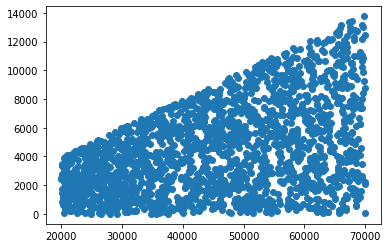

In [0]:
# income x loan
plt.scatter(base.iloc[:,1], base.iloc[:,3])

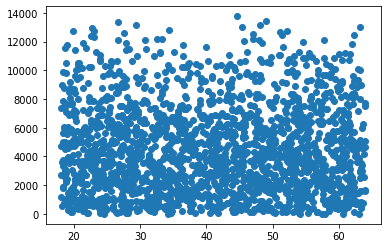

In [0]:
# age x loan
plt.scatter(base.iloc[:,2], base.iloc[:,3])

#Base Census

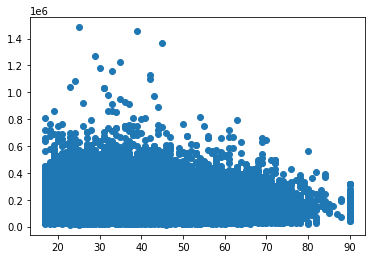

In [0]:
# age x final weight
plt.scatter(base_census.iloc[:, 0], base_census.iloc[:,2])

In [0]:
!pip install pyod

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 2.1MB 8.6MB/s 
  Created wheel for pyod: filename=pyod-0.8.0-cp36-none-any.whl size=105563 sha256=f49d48c5b6a027c96d7f1af86a5528ac16f87f566295b2f91e1f1feb14e211e6
  Stored in directory: /root/.cache/pip/wheels/ba/a6/81/2dd042e240090f3603a686b897d03402219a86e3f61bc71184
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=ca9bcd4a0bc6b27b979891a3f4cad843042ce2a407f1fb1fe81ab2b88b97c9c5
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=db0e75b73461313792c413bbb9be8464814b2ef0f613496427f31937b157f331
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [0]:
from pyod.models.knn import KNN
detector = KNN()
detector.fit(base.iloc[:,1:4])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [0]:
previsoes = detector.labels_
confianca_previsoes = detector.decision_scores_

In [0]:
outliers = []
for i in range(len(previsoes)):
    #print(previsoes[i])
    if previsoes[i] == 1:
        outliers.append(i)
        
lista_outliers = base.iloc[outliers, :]

In [0]:
lista_outliers

,clientid,income,age,loan,default
4,5,66952.688845,18.584336,8770.099235,1
24,25,65301.984029,48.840922,5465.267886,0
29,30,58842.891308,54.510948,10871.186790,0
34,35,57584.973790,36.672021,1728.423755,0
38,39,60921.063104,18.840526,968.836383,0
...,...,...,...,...,...
1943,1944,59792.508585,24.187499,660.241453,0
1944,1945,35879.519994,41.072935,5335.403499,0
1957,1958,50458.958203,52.314565,9852.889427,0
1996,1997,69516.127573,23.162104,3503.176156,0
